In [1]:
import pandas as pd
import os

In [2]:
combined_data = pd.read_csv('combined_data.csv')

<ipython-input-2-19098178a67d>:1: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('combined_data.csv')


In [3]:
combined_data = combined_data.drop(columns = 'Unnamed: 0')

In [4]:
combined_data.describe()

,Card Number,Account Code,Cashier ID,Promotion,Auth Code,13 - $2 Off Butcher Block Sala 13 - Accrued,13 - $2 Off Butcher Block Sala 13 - Redeemed,13 - $2 Off Butcher Block Sala 13 - Balance,1 - Dollars Spent 1 - Accrued,1 - Dollars Spent 1 - Redeemed,...,8 - Comp Dollars 8 - Balance,9 - Points 9 - Accrued,9 - Points 9 - Redeemed,9 - Points 9 - Balance,10 - Visits 10 - Accrued,10 - Visits 10 - Redeemed,10 - Visits 10 - Balance,0 - Stored Value 0 - Accrued,0 - Stored Value 0 - Redeemed,0 - Stored Value 0 - Balance
count,3.427840e+05,3.427840e+05,3.427840e+05,0.0,342784.000000,51974.000000,51974.000000,51974.000000,44713.000000,44713.0,...,0.0,44697.000000,44697.000000,44697.000000,43754.0,43754.0,43754.000000,6196.000000,6196.000000,6196.000000
mean,8.634597e+16,3.801665e+07,2.767726e+08,NaN,314587.991376,0.495844,-0.494516,0.501828,13.125668,0.0,...,NaN,52.553572,-47.877934,118.931405,1.0,0.0,44.070919,3.182214,-8.212418,9.419645
std,7.835656e+17,6.725248e+06,3.115306e+08,NaN,332548.269842,0.500141,0.509656,0.501922,9.170266,0.0,...,NaN,36.604246,98.700187,71.620513,0.0,0.0,81.506668,9.794539,7.273761,15.744335
min,1.741000e+11,3.201321e+07,0.000000e+00,NaN,-1.000000,0.000000,-1.000000,0.000000,-50.970000,0.0,...,NaN,-133.000000,-1000.000000,0.000000,1.0,0.0,1.000000,-30.000000,-56.440000,0.000000
25%,1.741017e+11,3.292459e+07,0.000000e+00,NaN,1.000000,0.000000,-1.000000,0.000000,7.290000,0.0,...,NaN,29.000000,0.000000,56.000000,1.0,0.0,8.000000,0.000000,-11.862500,0.000000
50%,1.741038e+11,3.294470e+07,3.202850e+07,NaN,205310.500000,0.000000,0.000000,1.000000,10.780000,0.0,...,NaN,43.000000,0.000000,115.000000,1.0,0.0,20.000000,0.000000,-7.380000,5.480000
75%,7.410117e+11,4.612036e+07,6.402356e+08,NaN,601755.250000,1.000000,0.000000,1.000000,17.050000,0.0,...,NaN,68.000000,0.000000,180.000000,1.0,0.0,47.000000,0.000000,-2.250000,14.230000
max,7.993570e+18,4.911428e+07,6.767888e+08,NaN,999995.000000,2.000000,2.000000,4.000000,287.250000,0.0,...,NaN,1149.000000,0.000000,299.000000,1.0,0.0,954.000000,200.000000,25.000000,249.910000


In [5]:
all_columns = combined_data.columns.to_list()
numerical_columns = combined_data.describe().columns.to_list()
categorical_columns = []
for column in all_columns:
    if column not in numerical_columns:
        categorical_columns.append(column)

In [6]:
info_list = categorical_columns.copy()

for column in numerical_columns:
    if combined_data.describe().loc['count',column] != float(0):
        info_list.append(column)

In [7]:
loyal_trans = combined_data.loc[:, info_list]

In [8]:
loyal_trans = loyal_trans[loyal_trans['Card Template'] == 'Loyalty']

In [9]:
loyal_trans = loyal_trans.drop(columns = ['Store Merchant','Wallet Type','Terminal ID','Identification Method',
                                          'Account Status','Sender','Auth Code'])

In [10]:
loyal_trans['Transaction Time'] = loyal_trans['Transaction Date'].map(lambda x : x[-5:])
loyal_trans['Transaction Date'] = loyal_trans['Transaction Date'].map(lambda x : x[:-5])

In [11]:
partial_data = loyal_trans[loyal_trans['Transaction Type'] != 'Campaign Expiration'].loc[:, ['13 - $2 Off Butcher Block Sala 13 - Redeemed',
                                                                                            '2 - $3 Signup Reward 2 - Redeemed',
                                                                                            '11 - Free Regular Fry 11 - Redeemed',
                                                                                            '4 - Free Original Concrete 4 - Redeemed',
                                                                                            '5 - $2 Off Soup Bowl 5 - Redeemed']]

In [12]:
partial_data['13 - $2 Off Butcher Block Sala 13 - Redeemed'] = partial_data['13 - $2 Off Butcher Block Sala 13 - Redeemed'].map(lambda x : abs(x) if x < 0 else 0)
partial_data['2 - $3 Signup Reward 2 - Redeemed'] = partial_data['2 - $3 Signup Reward 2 - Redeemed'].map(lambda x : abs(x) if x < 0 else 0)
partial_data['11 - Free Regular Fry 11 - Redeemed'] = partial_data['11 - Free Regular Fry 11 - Redeemed'].map(lambda x : abs(x) if x < 0 else 0)
partial_data['4 - Free Original Concrete 4 - Redeemed'] = partial_data['4 - Free Original Concrete 4 - Redeemed'].map(lambda x : abs(x) if x < 0 else 0)
partial_data['5 - $2 Off Soup Bowl 5 - Redeemed'] = partial_data['5 - $2 Off Soup Bowl 5 - Redeemed'].map(lambda x : abs(x) if x < 0 else 0)

In [30]:
partial_data = partial_data.rename(columns={'13 - $2 Off Butcher Block Sala 13 - Redeemed':'$2 Off Butcher Block Sala',
                            '2 - $3 Signup Reward 2 - Redeemed':'$3 Signup Reward',
                            '11 - Free Regular Fry 11 - Redeemed':'Free Regular Fry',
                            '4 - Free Original Concrete 4 - Redeemed':'Free Original Concrete',
                            '5 - $2 Off Soup Bowl 5 - Redeemed':'$2 Off Soup Bowl'})

In [31]:
partial_data.describe()

,$2 Off Butcher Block Sala,$3 Signup Reward,Free Regular Fry,Free Original Concrete,$2 Off Soup Bowl
count,274120.000000,274120.000000,274120.000000,274120.000000,274120.000000
mean,0.001164,0.003148,0.000029,0.003856,0.000051
std,0.034094,0.056021,0.005402,0.061977,0.007146
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#total redeemed number for each coupon
partial_data.sum()

$2 Off Butcher Block Sala     319.0
$3 Signup Reward              863.0
Free Regular Fry                8.0
Free Original Concrete       1057.0
$2 Off Soup Bowl               14.0
dtype: float64

In [33]:
len(loyal_trans['Card Number'].unique())

36283

In [34]:
#utilization/response rate for each coupon
partial_data.sum()/len(loyal_trans['Card Number'].unique())

$2 Off Butcher Block Sala    0.008792
$3 Signup Reward             0.023785
Free Regular Fry             0.000220
Free Original Concrete       0.029132
$2 Off Soup Bowl             0.000386
dtype: float64

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Utilization Rate within 3-months')

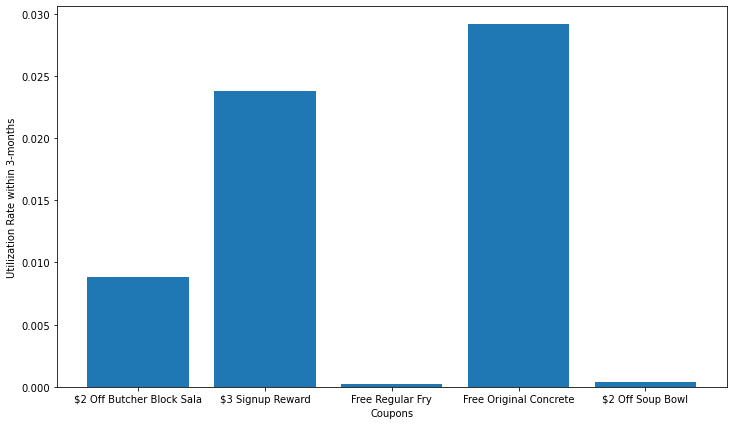

In [42]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(partial_data.columns, partial_data.sum()/len(loyal_trans['Card Number'].unique()))
ax.set_xlabel("Coupons")
ax.set_ylabel("Utilization Rate within 3-months")